In [69]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import random
import datetime
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
%matplotlib inline

In [70]:
coding_times=pd.read_csv("CodingHours.csv")
coding_times.columns =['Date','Minutes']
coding_times['Year'] = pd.to_datetime(coding_times['Date']).dt.year

coding_times.head()

,Date,Minutes,Year
0,01/02/2018,NaN,2018
1,01/03/2018,NaN,2018
2,01/04/2018,NaN,2018
3,01/05/2018,NaN,2018
4,01/06/2018,NaN,2018


In [71]:
hours_coded = coding_times['Minutes'].sum()/60
print("I have coded for:",hours_coded , "hours.")
print("I am", hours_coded/10000*100,"% toward my goal of 10,000 hours.")

I have coded for: 1739.5 hours.
I am 17.395 % toward my goal of 10,000 hours.


In [72]:
time_per_year = coding_times.groupby(["Year"]).Minutes.sum().reset_index()
time_per_year['Hours'] = time_per_year['Minutes']/60
print(time_per_year)



   Year  Minutes       Hours
0  2018   5880.0   98.000000
1  2019  21976.0  366.266667
2  2020  41469.0  691.150000
3  2021  19130.0  318.833333
4  2022  15915.0  265.250000


Text(0.5, 0, 'Years')

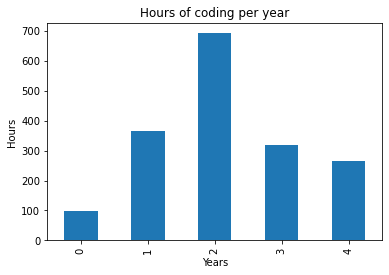

In [73]:
time_per_year['Hours'].plot(kind="bar", stacked=True)
plt.title("Hours of coding per year")
plt.ylabel("Hours")
plt.xlabel("Years")
